# Visualising results from PINN

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from itertools import product

In [ ]:
ds_lstm = xr.open_dataset("../data/processed/mse_LSTM2.nc")
ds_phys = xr.open_dataset("../data/processed/mse_physical_model.nc")
ds_boost = xr.open_dataset("../data/processed/mse_boosted_model.nc")
ds_pinn = xr.open_dataset("../data/processed/mse_pinn.nc")

In [38]:
ds_pinn

<xarray.Dataset> Size: 2kB
Dimensions:  (k: 20, c: 11)
Coordinates:
  * k        (k) int32 80B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * c        (c) float64 88B 11.0 11.5 12.0 12.5 13.0 ... 14.5 15.0 15.5 16.0
Data variables:
    mse      (k, c) float64 2kB ...
Attributes:
    patience:     20
    epochs:       100
    lambda_phys:  0.1

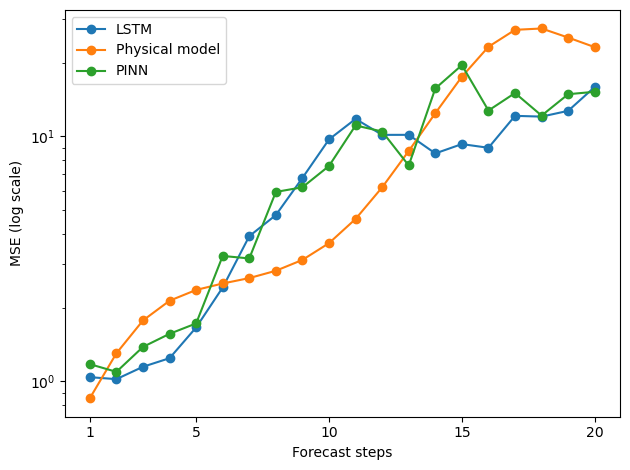

In [27]:
c=15

xticks=[1,5,10,15,20]

fig, ax = plt.subplots()
ax.set_yscale("log")
ds_lstm.mse.plot(ax=ax, marker="o", linestyle="-", label="LSTM")
ds_phys.mse.sel(c=c).plot(ax=ax, marker="o", linestyle="-", label="Physical model")
ds_pinn.mse.sel(c=c).plot(ax=ax, marker="o", linestyle="-", label="PINN")

ax.set_xticks(xticks)
ax.set_ylabel("MSE (log scale)")
ax.set_xlabel("Forecast steps")
ax.set_title("")
fig.tight_layout()


ax.legend()

In [12]:
from pathlib import Path

FIGURES = Path("../figures/PINN/base")
FIGURES.mkdir(parents=True, exist_ok=True)


In [ ]:
xticks=[1,5,10,15,20]

for c in np.linspace(11,16,11):
    fig, ax = plt.subplots()


    fig, ax = plt.subplots()
    ax.set_yscale("log")
    ds_lstm.mse.plot(ax=ax, marker="o", linestyle="-", label="LSTM")
    ds_phys.mse.sel(c=c).plot(ax=ax, marker="o", linestyle="-", label="Physical model")
    ds_pinn.mse.sel(c=c).plot(ax=ax, marker="o", linestyle="-", label="PINN")

    ax.set_xticks(xticks)
    ax.set_ylabel("MSE (log scale)")
    ax.set_xlabel("Forecast steps")
    ax.set_title("")
    fig.tight_layout()

    ax.legend()
    
    fig.savefig(FIGURES / f"mse_vs_k_c{c}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)  # important!